In [ ]:
import sys
import os
os.chdir("D:/Documents/DT2470 Music Informatics/Music_project") # Ersätt med er repo root directory
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd())))


In [2]:
from src.utilities.transition_cost import transition_cost
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("data/map.csv")
df.columns = [c.strip().lower() for c in df.columns] # Remove space, make lowercase
df.head()

,song,bpm,key,genre
0,alleswirdgut - Brutalismus 3000,150,4A,Hard techno
1,Drugs From Amsterdam - Mau P,125,2A,techno
2,eat horsegiirL,180,7A,Hard techno
3,Hot&perfecT - Six Sex,156,1A,Hard techno
4,Babushka - Indecorum,150,11A,Hard techno


Plotting the raw song data

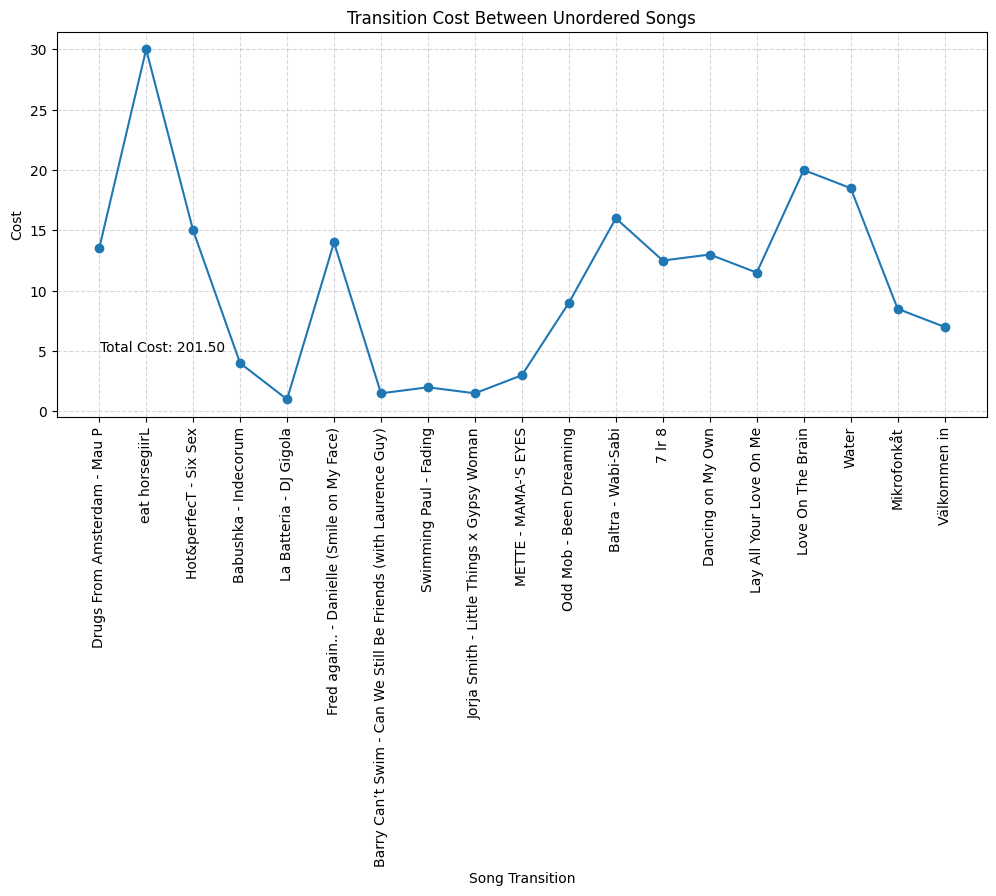

In [ ]:
songs = []
unordered_costs = []

for i in range(len(df) - 1):
    song1 = df.iloc[i] 
    song2 = df.iloc[i + 1]
    cost = transition_cost(song1, song2)
    unordered_costs.append(cost)
    songs.append({
        "from": song1["song"],
        "to": song2["song"],
        "cost": cost
    })

cost_df = pd.DataFrame(songs)

plt.figure(figsize=(12, 5))
plt.plot(cost_df["cost"], marker="o")
plt.xticks(range(len(cost_df)), cost_df["to"], rotation=90)
plt.title("Transition Cost Between Unordered Songs")
plt.xlabel("Song Transition")
plt.ylabel("Cost")
plt.grid(True, linestyle='--', alpha=0.5)
plt.text(0.02, 5, f"Total Cost: {sum(unordered_costs):.2f}")
plt.show()

Plotting the ordered songs using simulated annealing TSP-algorithm

The total transition cost of the ordered songs (using simulated annealing) is: 62% smaller than the unordered


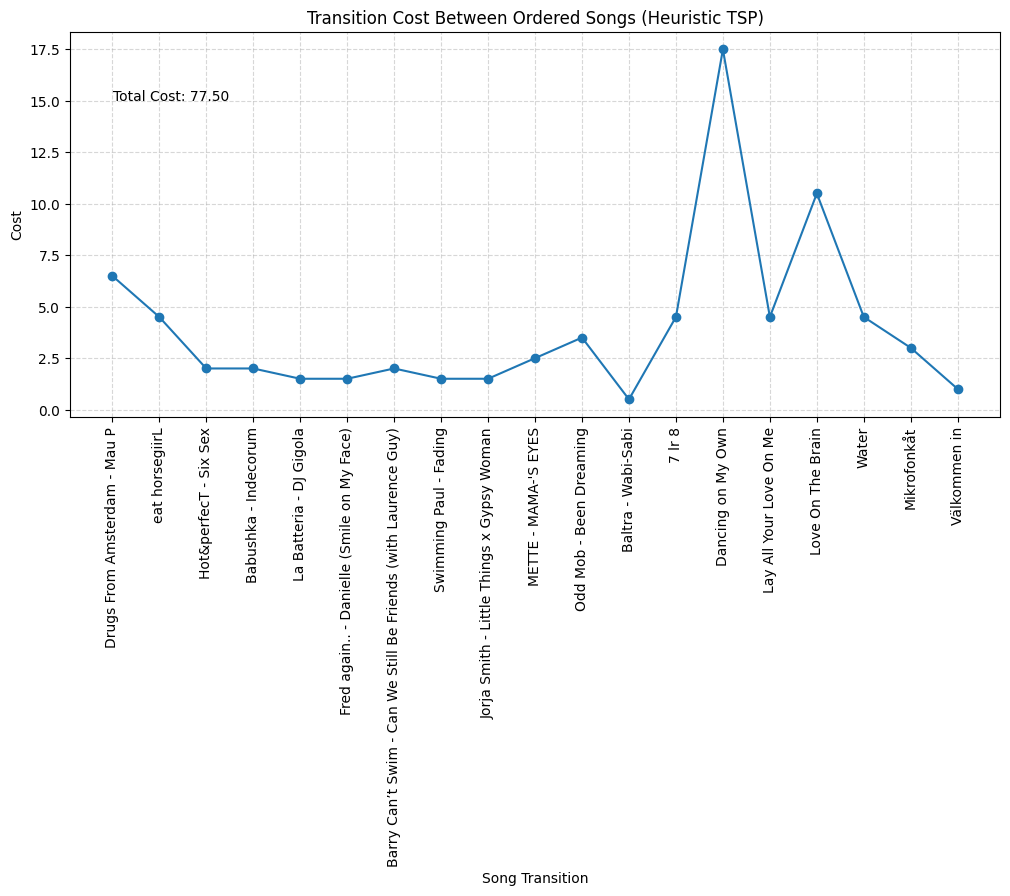

In [69]:
# Running it multiple times gives a cost variation of ~ +- 4%, with the cheapest permutation giving 77.5
# Below is a slow example of code for finding the fastest
"""best_perm, best_cost = None, float('inf')
for _ in range(7): # Only seemed to require around 5 runs to get the best permutation 
    perm, cost = tsp_python(cost_matrix.matrix)
    if cost < best_cost:
        best_perm, best_cost = perm, cost"""

from src.model.cost_matrix import CostMatrix
from python_tsp.heuristics import solve_tsp_simulated_annealing as tsp_annealing

cost_matrix = CostMatrix(df)
cost_matrix.compute_matrix() # Compute transition costs for all songs in the dataframe

# Indexes of optimal song order, and total cost
permutation, total_cost = tsp_annealing(cost_matrix.matrix) 

ordered_songs = [] 

# Relative difference in cost for comparison
cost_diff = round(100 * (sum(unordered_costs) - total_cost) / sum(unordered_costs)) 

for i in range(len(permutation) - 1):
    (index1, index2) = (permutation[i], permutation[i+1])
    song1 = df.iloc[index1]
    song2 = df.iloc[index2]
    cost = cost_matrix.get_cost(index1, index2) # Get cost from class method to avoid more calculations
    ordered_songs.append({
        "from": song1["song"],
        "to": song2["song"],
        "cost": cost
    })

ordered_df = pd.DataFrame(ordered_songs)

print(f"The total transition cost of the ordered songs (using simulated annealing) is: {cost_diff}% smaller than the unordered")

plt.figure(figsize=(12, 5))
plt.plot(ordered_df["cost"], marker="o")
plt.xticks(range(len(ordered_df)), cost_df["to"], rotation=90)
plt.title("Transition Cost Between Ordered Songs (Heuristic TSP)")
plt.xlabel("Song Transition")
plt.ylabel("Cost")
plt.grid(True, linestyle='--', alpha=0.5)
plt.text(0.02, 15, f"Total Cost: {total_cost:.2f}")
plt.show()



Using local search algorithm (Seems to give greater cost spread between permutations)

The total transition cost of the ordered songs (using local search) is: 62% smaller than the unordered


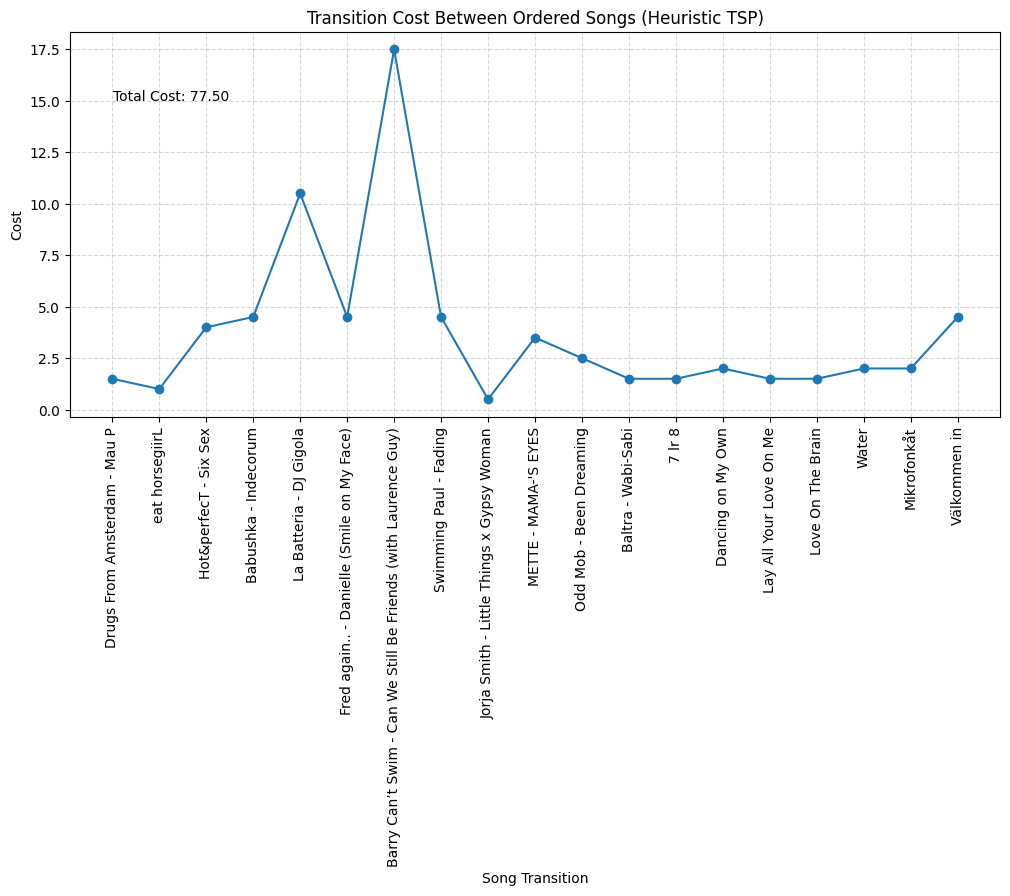

In [79]:
# Indexes of optimal song order, and total cost
from python_tsp.heuristics import solve_tsp_local_search as tsp_local
permutation, total_cost = tsp_local(cost_matrix.matrix) 

ordered_songs = [] 

# Relative difference in cost for comparison
cost_diff = round(100 * (sum(unordered_costs) - total_cost) / sum(unordered_costs)) 

for i in range(len(permutation) - 1):
    (index1, index2) = (permutation[i], permutation[i+1])
    song1 = df.iloc[index1]
    song2 = df.iloc[index2]
    cost = cost_matrix.get_cost(index1, index2) # Get cost from class method to avoid more calculations
    ordered_songs.append({
        "from": song1["song"],
        "to": song2["song"],
        "cost": cost
    })

ordered_df = pd.DataFrame(ordered_songs)

print(f"The total transition cost of the ordered songs (using local search) is: {cost_diff}% smaller than the unordered")

plt.figure(figsize=(12, 5))
plt.plot(ordered_df["cost"], marker="o")
plt.xticks(range(len(ordered_df)), cost_df["to"], rotation=90)
plt.title("Transition Cost Between Ordered Songs (Heuristic TSP)")
plt.xlabel("Song Transition")
plt.ylabel("Cost")
plt.grid(True, linestyle='--', alpha=0.5)
plt.text(0.02, 15, f"Total Cost: {total_cost:.2f}")
plt.show()


Using dynamic programming (Very slow but instantly gives shortest cost)

The total transition cost of the ordered songs (using dynamic programming) is: 62% smaller than the unordered


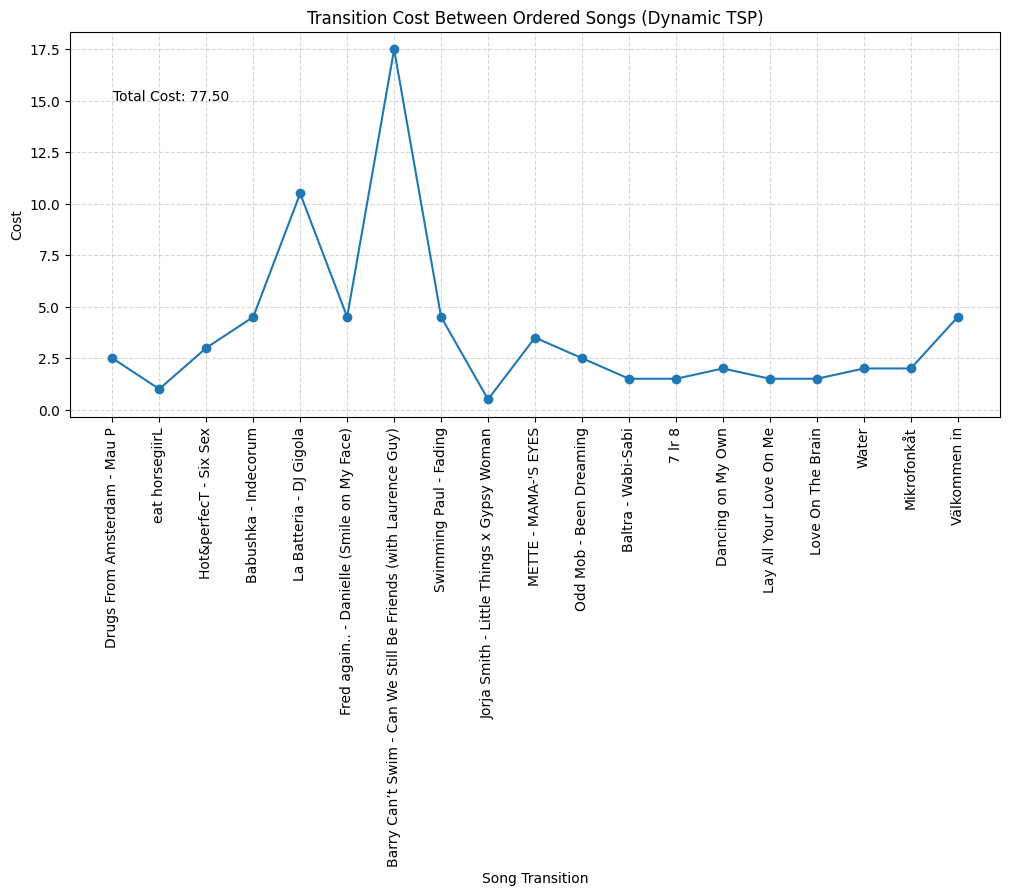

In [80]:
# Indexes of optimal song order, and total cost
from python_tsp.exact import solve_tsp_dynamic_programming as tsp_dynamic
permutation, total_cost = tsp_dynamic(cost_matrix.matrix) 

ordered_songs = [] 

# Relative difference in cost for comparison
cost_diff = round(100 * (sum(unordered_costs) - total_cost) / sum(unordered_costs)) 

for i in range(len(permutation) - 1):
    (index1, index2) = (permutation[i], permutation[i+1])
    song1 = df.iloc[index1]
    song2 = df.iloc[index2]
    cost = cost_matrix.get_cost(index1, index2) # Get cost from class method to avoid more calculations
    ordered_songs.append({
        "from": song1["song"],
        "to": song2["song"],
        "cost": cost
    })

ordered_df = pd.DataFrame(ordered_songs)

print(f"The total transition cost of the ordered songs (using dynamic programming) is: {cost_diff}% smaller than the unordered")

plt.figure(figsize=(12, 5))
plt.plot(ordered_df["cost"], marker="o")
plt.xticks(range(len(ordered_df)), cost_df["to"], rotation=90)
plt.title("Transition Cost Between Ordered Songs (Dynamic TSP)")
plt.xlabel("Song Transition")
plt.ylabel("Cost")
plt.grid(True, linestyle='--', alpha=0.5)
plt.text(0.02, 15, f"Total Cost: {total_cost:.2f}")
plt.show()
